## Check House

Esse projeto teve como iniciativa experienciar o mundo IA e iniciar um projeto de encurtador de rotas para aplicativo,
basicamente a ideia dentro do progresso da IA é saber o que o usuário quer consertar ou mudar dentro da sua casa por meio de uma foto, Redirecionando-o para o catálogo específico.

Iniciei o projeto no Ubuntu 22.04 com o python na versão 3.10 para experienciar o projeto 'Is it a bird?' e me deparei com diversos erros de versão, pelas minhas tentativas a que melhor se adequou foi o python 3.7.9 na qual foi desenvolvido esse projeto.
 comando 'pip install fastai', no windows 11.

## Download images of plumbing

In [105]:
%pip install -Uqq duckduckgo_search

Note: you may need to restart the kernel to use updated packages.


In [106]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=200):
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

Nesse exemplo inicial userei como teste plumbing(encanamento) 


In [107]:
urls = search_images('old plumbing photos', max_images=1)
urls[0]

'https://media.gettyimages.com/photos/old-plumbing-in-industrial-plant-picture-id158765786'

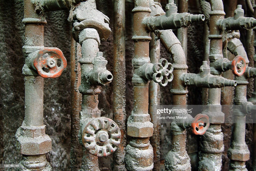

In [108]:
from fastdownload import download_url
dest = 'plumbing.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Agora pegarei fotos de encanamentos desgastados

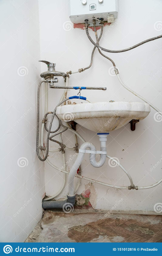

In [109]:
download_url(search_images('dirty plumbing photos', max_images=1)[0], 'bad.jpg', show_progress=False)
Image.open('bad.jpg').to_thumb(256,256)

Prover mais exemplos agrupáveis de 'bons encanamentos' e 'encanamentos velhos'

In [110]:
searches = 'good plumbing', 'bad plumbing'
path = Path('good_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} pipe photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} clean photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest= path/o)

## Train the model


Excluir as fotos que causarem erros ou dependencias

In [111]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

28

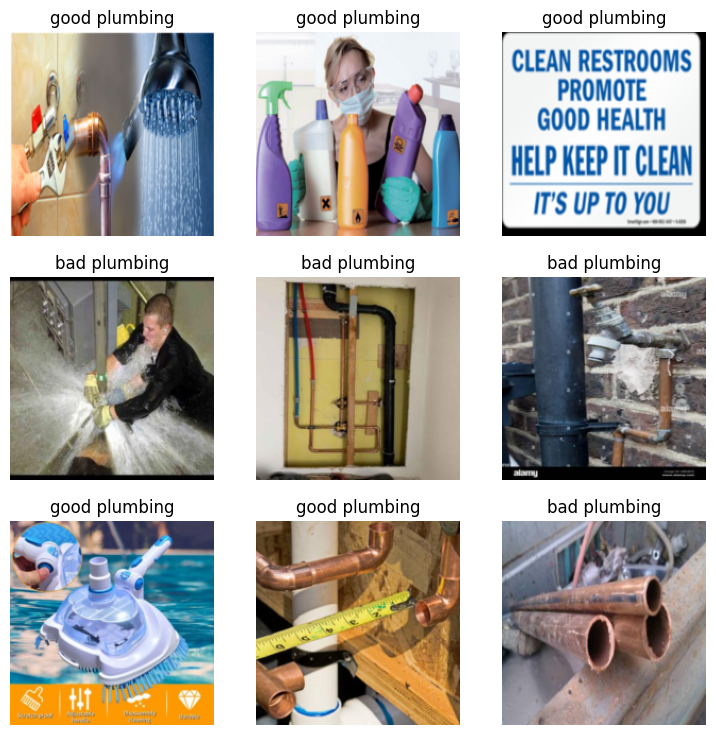

In [112]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=9)

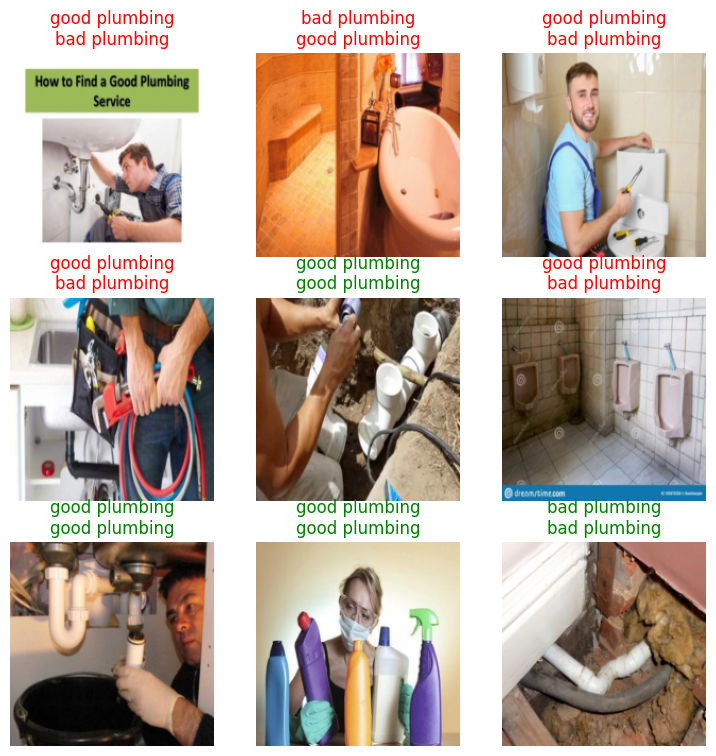

In [113]:
import torch
learn = vision_learner(dls, resnet18, metrics=error_rate)
#learn.fine_tune(3)
learn.show_results()

In [114]:
is_good,_,probs = learn.predict(PILImage.create('plumbing.jpg'))
print(f"This is a: {is_good}.")
print(f"Probability this need to fix: {probs[0]:.4f}")

This is a: bad plumbing.
Probability this need to fix: 0.9951
